# Exercise 6: Support Vector Machines

*Solution Author: Brian Pardo*

*These are solutions to [programming exercise 6](https://www.coursera.org/learn/machine-learning/programming/e4hZk/support-vector-machines) for Coursera's Machine Learning course by Andrew Ng.*

## Support Vector Machines
In this exercise, we will be using support vector machines (SVMs) to build a spam classifier. 

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sklearn.svm
import re
from nltk.stem.porter import *

In [2]:
my_data = scipy.io.loadmat('ex6data1.mat')

x = my_data['X']
y = my_data['y']

my_data = np.append(x, y, axis=1)

In [3]:
ex_pos1 = my_data[my_data[:,2]==True]
ex_neg1 = my_data[my_data[:,2]==False]

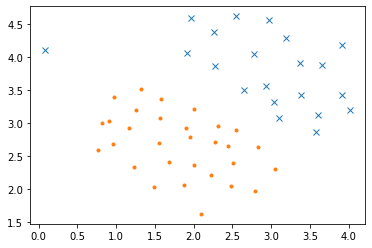

In [4]:
fig1, ax = plt.subplots()
ax.plot(ex_pos1[:,0], ex_pos1[:,1],'x')
ax.plot(ex_neg1[:,0], ex_neg1[:,1],'.');

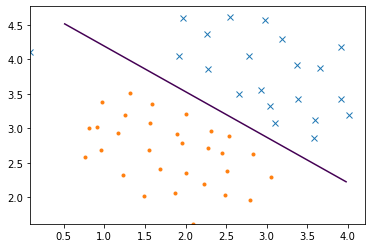

In [5]:
# Train the classifier
C = 1
clf = sklearn.svm.SVC(kernel='linear')
clf.fit(x, y.flatten())

# Plot the SVM decision boundary
delta = 0.1
x1 = np.arange(x[:,0].min(), x[:,0].max(), delta).reshape(-1,1)
x2 = np.arange(x[:,1].min(), x[:,1].max(), delta).reshape(-1,1)
X1, X2 = np.meshgrid(x1, x2)
z = np.empty(np.shape(X1))
for i in range(len(X1)):
    for j in range(len(X1[0])):
        Xtemp = np.array([[X1[i,j],X2[i,j]]])
        z[i,j] = clf.decision_function(Xtemp)

ax.contour(X1,X2,z,[0])
fig1

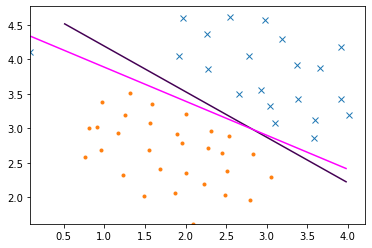

In [6]:
# Train the classifier
clf = sklearn.svm.SVC(kernel='linear',C=10)
clf.fit(x, y.flatten())

# Plot the SVM decision boundary
for i in range(len(X1)):
    for j in range(len(X1[0])):
        Xtemp = np.array([[X1[i,j],X2[i,j]]])
        z[i,j] = clf.decision_function(Xtemp)

ax.contour(X1,X2,z,[0],cmap = 'spring')
fig1

In [7]:
my_data2 = scipy.io.loadmat('ex6data2.mat')
x = my_data2['X']
y = my_data2['y']

my_data2 = np.append(x, y, axis=1)

ex_pos2 = my_data2[my_data2[:,2]==True]
ex_neg2 = my_data2[my_data2[:,2]==False]

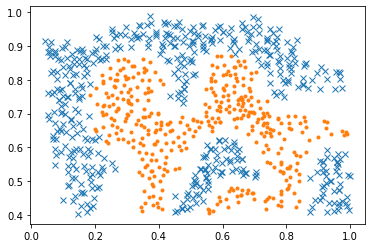

In [8]:
fig2, ax = plt.subplots()
ax.plot(ex_pos2[:,0], ex_pos2[:,1],'x')
ax.plot(ex_neg2[:,0], ex_neg2[:,1],'.');

In [9]:
C = 10
sigma = 0.1 
args = {'C': C, 'gamma': sigma**(-2)}
gauss_svm = sklearn.svm.SVC(kernel='rbf', **args)
gauss_svm.fit(x, y.flatten());

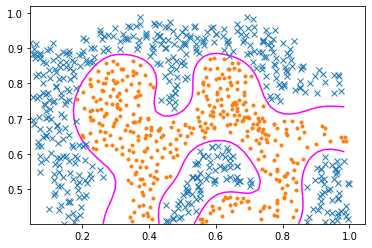

In [10]:
# Plot the SVM decision boundary
delta = 0.02
x1 = np.arange(x[:,0].min(), x[:,0].max(), delta).reshape(-1,1)
x2 = np.arange(x[:,1].min(), x[:,1].max(), delta).reshape(-1,1)
X1, X2 = np.meshgrid(x1, x2)
z = np.empty(np.shape(X1))
for i in range(len(X1)):
    for j in range(len(X1[0])):
        Xtemp = np.array([[X1[i,j],X2[i,j]]])
        z[i,j] = gauss_svm.decision_function(Xtemp)

ax.contour(X1,X2,z,[0],cmap = 'spring')
fig2

In [65]:
my_data3 = scipy.io.loadmat('ex6data3.mat')
x = my_data3['X']
y = my_data3['y']
x_val = my_data3['Xval']
y_val = my_data3['yval']

my_data3 = np.append(x, y, axis=1)

ex_pos3 = my_data3[my_data3[:,2]==True]
ex_neg3 = my_data3[my_data3[:,2]==False]

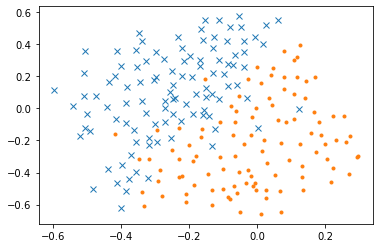

In [94]:
fig3, ax = plt.subplots()
ax.plot(ex_pos3[:,0], ex_pos3[:,1],'x')
ax.plot(ex_neg3[:,0], ex_neg3[:,1],'.');

In [68]:
# Test a range of parameters and choose the optimal ones

C_test = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]);
sig_test = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]);


c_val, sigma = 0.001, 0.001
def svm_error(x, y, x_val, y_val, c, sigma):
    args = {'C': c, 'gamma': (1/sigma)**2}
    model = sklearn.svm.SVC(kernel='rbf', **args)
    model.fit(x, y.flatten());
    p = model.predict(x_val)
    return 1-np.mean(p == y_val.flatten())

error = svm_error(x, y, x_val, y_val, C, sigma)

for c in C_test:
    for sig in sig_test:
        current_error = svm_error(x, y, x_val, y_val, c, sig)
        if (current_error < error):
            c_val, sigma, error = c, sig, current_error

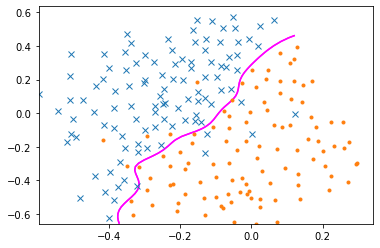

In [96]:
# Plot the SVM decision boundary
args = {'C': c_val, 'gamma': (1/sigma)**2}
svm_model = sklearn.svm.SVC(kernel='rbf', **args)
svm_model.fit(x, y.flatten());

delta = 0.02
x1 = np.arange(x[:,0].min(), x[:,0].max()-0.1, delta).reshape(-1,1)
x2 = np.arange(x[:,1].min(), x[:,1].max()-0.1, delta).reshape(-1,1)
X1, X2 = np.meshgrid(x1, x2)
z = np.empty(np.shape(X1))
for i in range(len(X1)):
    for j in range(len(X1[0])):
        Xtemp = np.array([[X1[i,j],X2[i,j]]])
        z[i,j] = svm_model.decision_function(Xtemp)
ax.contour(X1,X2,z,[0],cmap = 'spring');
fig3

## Part 2. Spam classification
Many email services today provide spam filters that are able to classify emails into spam and non-spam email with high accuracy. We will use SVMs to build our own basic spam filter. We need to convert each email into a feature vector. The dataset for this part of the exercise is based on a a subset of the SpamAssassin Public Corpus.

Before starting on a machine learning task, it is usually insightful to take a look at examples from the dataset. Below we have a sample email that contains a URL, an email address (at the end), numbers, and dollar amounts. While many emails would contain similar types of entities (e.g., numbers, other URLs, or other email addresses), the specific entities (e.g., the specic URL or specific dollar amount) will be different in almost every email.

In [139]:
# Print the first 10 lines of a sample email
with open('spamSample2.txt') as sample:
    line = " "
    while line:
        line = sample.readline()
        if not re.match(" *\n",line):
            print(line.strip("\n"))
            
def read_email(file_name):
    with open(file_name) as file:
        file_str = file.read()
    return file_str

Best Buy Viagra Generic Online
Viagra 100mg x 60 Pills $125, Free Pills & Reorder Discount, Top Selling 100% Quality & Satisfaction guaranteed!
We accept VISA, Master & E-Check Payments, 90000+ Satisfied Customers!
http://medphysitcstech.ru



Therefore, one method often employed in processing emails is to 'normalize' these values, so that all URLs are treated the same, all numbers are treated the same, etc. For example, we could replace each URL in the email with the unique string "httpaddr" to indicate that a URL was present. This has the effect of letting the spam classifier make a classification decision based on whether any URL was present, rather than whether a specific URL was present. This typically improves the performance of a spam classifier, since spammers often randomize the URLs, and thus the odds of seeing any particular URL again in a new piece of spam is very small.
    
* **Lower-casing:** The entire email is converted into lower case, so that captialization is ignored (e.g., IndIcaTE is treated the same as indicate).

* **Stripping HTML:** All HTML tags are removed from the emails. Many emails often come with HTML formatting; we remove all the HTML tags, so that only the content remains.

* **Normalizing URLs:** All URLs are replaced with the text "httpaddr".

* **Normalizing Email Addresses:** All email addresses are replaced with the text "emailaddr".

* **Normalizing Numbers:** All numbers are replaced with the text 'number'.

* **Normalizing Dollars:** All dollar signs are replaced with the text 'dollar'.

* **Word Stemming:** Words are reduced to their stemmed form. For example, 'discount', 'discounts', 'discounted' and 'discounting' are all replaced with 'discount'. Sometimes, the Stemmer actually strips off additional characters from the end, so 'include', 'includes', 'included', and 'including' are all replaced with 'includ'.

* **Removal of non-words:** Non-words and punctuation have been removed. All white spaces (tabs, newlines, spaces) have all been trimmed to a single space character.

In [279]:
vocab_list = {}
vocab_idx = {}
with open('vocab.txt') as vocab:
    for i, word in enumerate(vocab):
        vocab_list[word.split()[1]] = i
        vocab_idx[i] = word.split()[1]

def process_email(file_name):
    email = read_email(file_name)
    # lower-casing
    email = email.lower()
    # strip HTML
    email = re.sub('<[^<>]+>', ' ', email)
    # normalize URLs to httpaddr
    email = re.sub('(http|https)://[^\s]*', 'httpaddr', email)
    # normalize email addresses to emailaddr
    email = re.sub('[^\s]+@[^\s]+', 'emailaddr', email)
    # normalize numbers to number
    email = re.sub('[0-9]+', ' number ', email)
    # normalize dollar symbols to dollar
    email = re.sub('[$]+', 'dollar', email)
    # remove non-words and punctuation and trim white space to single character
    email = re.sub('[^a-zA-Z0-9]', ' ', email)
    # split on whitespace
    email = email.split()
    # word stemming
    stemmer = PorterStemmer()
    email = [stemmer.stem(token) for token in email]
    return email

def email_features(word_list):
    x = np.zeros(len(vocab_list.keys()))
    
    for word in word_list:
        if word in vocab_list:
            x[vocab_list[word]] = 1
    
    return x
        
email = process_email('spamSample2.txt')
x = email_features(email)

In [245]:
spam_train_data = scipy.io.loadmat('spamTrain.mat')
spam_test_data = scipy.io.loadmat('spamTest.mat')
x_train = spam_train_data['X']
y_train = spam_train_data['y'].flatten()
x_test = spam_test_data['Xtest']
y_test = spam_test_data['ytest'].flatten()

In [247]:
spam_model = sklearn.svm.SVC(C=0.1, kernel='linear')
spam_model.fit(x_train, y_train)
p_train = spam_model.predict(x_train)
p_test  = spam_model.predict(x_test)

In [250]:
print(f'Training accuracy: {np.mean(p_train==y_train)}\nTest set accuracy: {np.mean(p_test==y_test)}')

Training accuracy: 0.99825
Test set accuracy: 0.989


In [274]:
w = spam_model.coef_.flatten()

In [310]:
# Print out the 15 most spammy words
idx = np.argsort(w)[-15:][::-1]

for i in idx:
    print(f'Word: {vocab_idx[i]:8}   Weight: {w[i]:.4}') 

Word: our        Weight: 0.5006
Word: click      Weight: 0.4659
Word: remov      Weight: 0.4229
Word: guarante   Weight: 0.3836
Word: visit      Weight: 0.3677
Word: basenumb   Weight: 0.3451
Word: dollar     Weight: 0.3236
Word: will       Weight: 0.2697
Word: price      Weight: 0.2673
Word: pleas      Weight: 0.2612
Word: most       Weight: 0.2573
Word: nbsp       Weight: 0.2539
Word: lo         Weight: 0.2535
Word: ga         Weight: 0.2483
Word: hour       Weight: 0.2464
